# Inteligent Rock-Paper-Scissors Game!
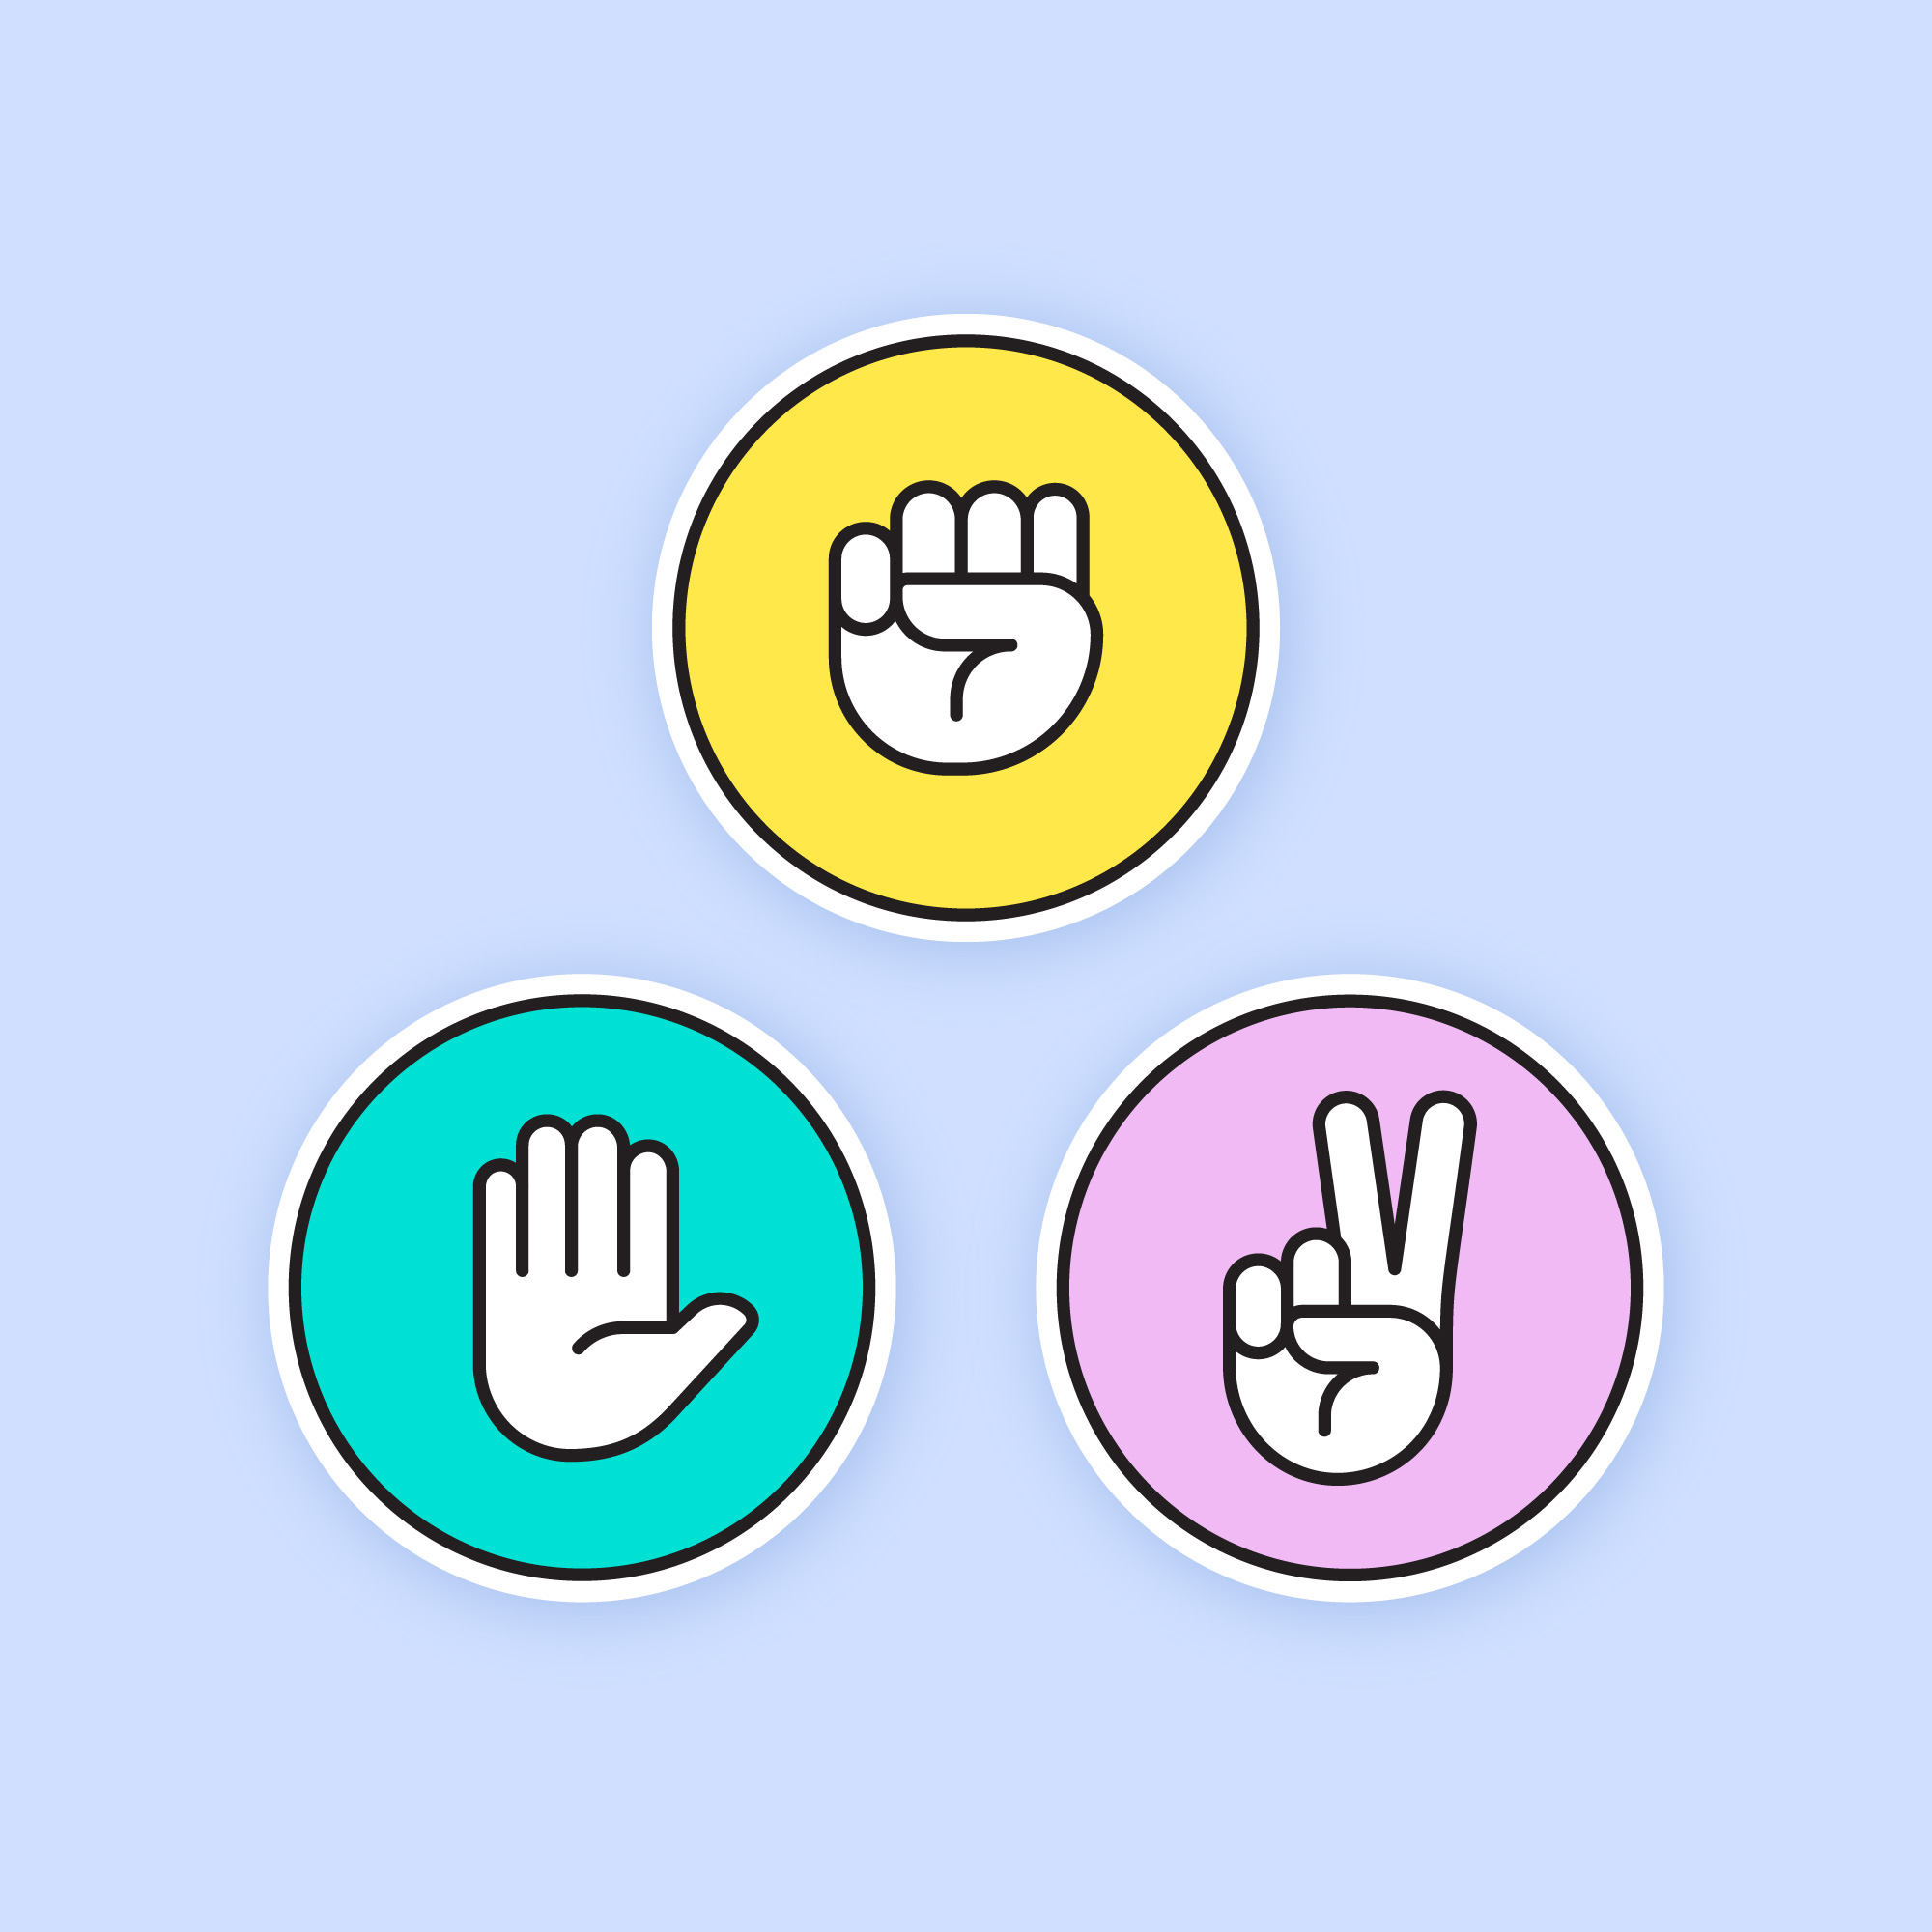
* Image source: https://www.vecteezy.com/vector-art/690865-rock-paper-scissors-line-icons

### Importing Dependencies

In [1]:
import os
from PIL import Image
import sys
import time
import math
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import random
import pygame
import pygame.camera
from pygame.locals import *
import torch
from ultralytics import YOLO

pygame 2.6.0 (SDL 2.28.4, Python 3.10.14)
Hello from the pygame community. https://www.pygame.org/contribute.html


### Defining the path of the images and icons

In [2]:
rock_icon = os.path.join("Game Icons/rock_pixel.png")
paper_icon = os.path.join("Game Icons/paper_pixel.png")
scissors_icon = os.path.join("Game Icons/scissors_pixel.png")
background_image = os.path.join("Game Icons/BackGround.png")
background_image_blur = os.path.join("Game Icons/8bit-pixel-graphic-blue-sky-background-with-clouds-vector.jpg")
play_background = os.path.join("Game Icons/Free-Sky-with-Clouds-Background-Pixel-Art4.jpg")
button_image = os.path.join("Game Icons/Button_1.png")
button_image_2 = os.path.join("Game Icons/Button_2.png")
# background_image_blur = cv.imread(background_image)
# background_image_blur = cv.blur(background_image_blur, (10, 10))
# cv.imwrite("Game Icons/BackGroundBlur.png", background_image_blur)

### Describing each condition of the game between player and AI 

In [3]:
conditions = {0:"You won!", 1: "You lose!", 2:"Draw"}
classes = {0:"Rock", 1:"Paper", 2:"Scissors"}

class GameAI():
    
    def AI_random_chooser():
        choicses = [0, 1, 2]
        c = random.choice(choicses)
        return(c)

    def conditions(player, AI):
        if player == classes[0] and AI == classes[1]:
            return(1)
        elif player == classes[0] and AI == classes[2]:
            return(0)
        elif player == classes[0] and AI == classes[0]:
            return(2)

        elif player == classes[1] and AI == classes[0]:
            return(0)
        elif player == classes[1] and AI == classes[2]:
            return(1)
        elif player == classes[1] and AI == classes[1]:
            return(2)

        elif player == classes[2] and AI == classes[0]:
            return(1)
        elif player == classes[2] and AI == classes[1]:
            return(0)
        elif player == classes[2] and AI == classes[2]:
            return(2)

### Defining sizes and converting images into pygame format

In [4]:
pygame.init()
pygame.camera.init()
WIDTH, HEIGHT = 1280, 720
FPS = 60

yolo_repo_path = "/Users/Sina/Desktop/Summer Projects/Rock Paper Scissors/Yolo-Model"
model_path = os.path.join(yolo_repo_path, 'runs', 'detect', 'train17', 'weights', 'best.pt')
model = YOLO(model_path)

title_font = pygame.font.SysFont("KarmaFuture-Regular", 45)
texts_font = pygame.font.SysFont("ARCADECLASSIC", 30)
buttons_font = pygame.font.SysFont("ARCADECLASSIC", 80)
buttons_font_2 = pygame.font.SysFont("ARCADECLASSIC", 40)

icon_size = 200

bg_img = pygame.transform.scale(pygame.image.load(background_image), (WIDTH, HEIGHT))
bg_img_rect = bg_img.get_rect(center=(WIDTH//2, HEIGHT//2))

button_1_img = pygame.transform.scale(pygame.image.load(button_image), (400, 150))
button_1_img_rect = button_1_img.get_rect(center=(2000, 2000))

button_2_img = pygame.transform.scale(pygame.image.load(button_image_2), (300, 100))
button_2_img_rect = button_2_img.get_rect(center=(2000, 2000))

text = title_font.render("Welcome To Machine Vision Rock, Paper Scissors!", True, 'black')
text_rect = text.get_rect(center=(2000,2000))
start_text = buttons_font.render("Start", True, 'orange')
start_text_rect = start_text.get_rect(center=(2000, 2000))
quit_text = buttons_font.render("Quit", True, 'orange')
quit_text_rect = quit_text.get_rect(center=(2000, 2000))

rock = pygame.transform.scale(pygame.image.load(rock_icon), (icon_size, icon_size))
rock_rect = rock.get_rect(topleft=(750, 150))
paper = pygame.transform.scale(pygame.image.load(paper_icon), (icon_size, icon_size))
paper_rect = rock.get_rect(topleft=(1030, 150))
scissors = pygame.transform.scale(pygame.image.load(scissors_icon), (icon_size, icon_size))
scissors_rect = rock.get_rect(topleft=(880, 400))

blur_bg_img = pygame.transform.scale(pygame.image.load(background_image_blur), (WIDTH, HEIGHT))
blur_bg_img_rect = blur_bg_img.get_rect(center=(WIDTH//2, HEIGHT//2))
play_bg = pygame.transform.scale(pygame.image.load(play_background), (WIDTH, HEIGHT))
play_bg_rect = play_bg.get_rect(center=(WIDTH//2, HEIGHT//2))

clock = pygame.time.Clock()
window = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Rock Paper Scissors!")
icon = pygame.image.load('Game Icons/icon.png') 
pygame.display.set_icon(icon)

menu_sound = pygame.mixer.Sound("Game Sounds/Boom Nation.mp3")
start_sound = pygame.mixer.Sound("Game Sounds/crumpled paper.mp3")
quit_sound = pygame.mixer.Sound("Game Sounds/Snip with scissor.mp3")
capture_sound = pygame.mixer.Sound("Game Sounds/camera shutter.mp3")
play_sound = pygame.mixer.Sound("Game Sounds/play sound.mp3")

quit_sound.set_volume(1)
menu_sound.set_volume(0.2)
capture_sound.set_volume(0.3)
start_sound.set_volume(0.3)
play_sound.set_volume(0.3)

sound_on_button = pygame.transform.scale(pygame.image.load("Game Icons/Sound On.png"), (40, 40))
sound_off_button = pygame.transform.scale(pygame.image.load("Game Icons/Sound Off.png"), (40, 40))
sound_button = sound_on_button
sound_button_rect = sound_button.get_rect(center=(640, 340))

x_min_start, x_max_start, y_min_start, y_max_start = 511, 810, 318, 402
x_min_quit, x_max_quit, y_min_quit, y_max_quit = 512, 807, 517, 601
x_min_capture, x_max_capture, y_min_capture, y_max_capture = 223, 440, 645, 680

alpha = 255
fading_speed = 5

run = True
fade_out = False
fade_in = False
sound_flag = 2
start_sound_flag = True
fade_flag = False
red_flag = True
flash = 0
flash_press = False
numpy_webcam = None
number = 0
number_press = False
play = False
restart = False
timer = 0
positions = [(750, 150), (1030, 150), (880, 400)]

rock_play = pygame.transform.scale(pygame.image.load(rock_icon), (350, 350))
paper_play = pygame.transform.scale(pygame.image.load(paper_icon), (350, 350))
scissors_play = pygame.transform.scale(pygame.image.load(scissors_icon), (350, 350))

rock_paper_scissors = [rock, paper, scissors]
play_icons = {0:rock_play, 1:paper_play, 2:scissors_play}

camlist = pygame.camera.list_cameras()
if not camlist:
    raise ValueError("No cameras detected!")
    sys.exit()

cam = pygame.camera.Camera(camlist[0], (480, 640))
cam.start()

while run:
    
    window.fill(pygame.Color(0,0,0))
    clock.tick(FPS)
    if start_sound_flag:
        menu_sound.play()
    
    for event in pygame.event.get():
        
        if event.type == pygame.QUIT:
            run = False
            
        pos=pygame.mouse.get_pos()
        if x_min_start <=pos[0]<= x_max_start and y_min_start <=pos[1]<= y_max_start:
            start_text = buttons_font.render("Start", True, 'white')
        else:
            start_text = buttons_font.render("Start", True, 'orange')
        if x_min_quit <=pos[0]<= x_max_quit and y_min_quit <=pos[1]<= y_max_quit:
            quit_text = buttons_font.render("Quit", True, 'white')
        else:
            quit_text = buttons_font.render("Quit", True, 'orange')
        
        if event.type == pygame.MOUSEBUTTONUP:
            pos=pygame.mouse.get_pos()
            if not fade_in and not play:
                if x_min_start <=pos[0]<= x_max_start and y_min_start <=pos[1]<= y_max_start:
                    start_text = buttons_font.render("Start", True, 'orange')
                    start_sound_flag = False
                    menu_sound.stop()
                    start_sound.play()
                    fade_out = True
                
                if 30 <=pos[0]<= 65 and 650 <=pos[1]<= 695:
                    if sound_flag % 2 == 0:
                        sound_button = sound_off_button
                        menu_sound.set_volume(0)
                        sound_flag += 1
                    else:
                        sound_button = sound_on_button
                        menu_sound.set_volume(0.2)
                        sound_flag += 1
                
                if x_min_quit <=pos[0]<= x_max_quit and y_min_quit <=pos[1]<= y_max_quit:
                    quit_text = buttons_font.render("Quit", True, 'orange')
                    menu_sound.stop()
                    time.sleep(0.2)
                    quit_sound.play()
                    time.sleep(0.9)
                    run = False
                    
            if fade_flag:
                if x_min_capture <=pos[0]<= x_max_capture and y_min_capture <=pos[1]<= y_max_capture:
                    numpy_webcam = pygame.surfarray.array3d(webcam)
                    numpy_webcam = numpy_webcam.swapaxes(0,1)
                    computer_choise = GameAI.AI_random_chooser()
                    numpy_webcam = np.rot90(numpy_webcam)
                    numpy_webcam = np.rot90(numpy_webcam)
                    numpy_webcam = np.rot90(numpy_webcam)
                    numpy_webcam = np.rot90(numpy_webcam)
                    numpy_webcam = cv.cvtColor(numpy_webcam, cv.COLOR_RGB2BGR)
                    
                    if numpy_webcam is not None:

                        pred = model(numpy_webcam)
                        for result in pred:
                            boxes = result.boxes  # Boxes object for bounding box outputs
                            pred_img = result.orig_img

                        if len(boxes.xyxy) != 0:
                            label = int(boxes.data[0][-1])
                        else:
                            print("Nothing Detected")
                            run = False
                            sys.exit()

                    else:
                        print("Game exited!")
                        run = False
                        sys.exit()
                    
                    flash_press = True
                    capture_sound.play()
                    fade_flag = False
                
                if 893 <=pos[0]<= 1106 and 640 <=pos[1]<= 680:
                    play_sound.play()
                    time.sleep(0.5)
                    fade_in = False
                    play = True
            
            if play:
                if 513 <=pos[0]<= 727 and 642 <=pos[1]<= 679:
                    restart = True
                    play = False
            
            if restart:
                fade_in = True
                fade_out = False
                restart = False
    
    if fade_out:
        alpha -= fading_speed
        if alpha <= 0:
            fade_in = True
            fade_out = False
            
        bg_img.set_alpha(alpha)
        window.blit(bg_img, bg_img_rect)
        text.set_alpha(alpha)
        window.blit(text, text_rect)
        start_text.set_alpha(alpha)
        window.blit(start_text, start_text_rect)
        quit_text.set_alpha(alpha)
        window.blit(quit_text, quit_text_rect)
        button_1_img.set_alpha(alpha)
        window.blit(button_1_img, button_1_img_rect)
        sound_button.set_alpha(alpha)
        window.blit(sound_button, sound_button_rect)
    
    if fade_in:
        if alpha >= 255:
            alpha = 255
        alpha += fading_speed
        blur_bg_img.set_alpha(alpha)
        window.blit(blur_bg_img, blur_bg_img_rect)

        window.blit(rock, rock_rect)
        window.blit(paper, paper_rect)
        window.blit(scissors, scissors_rect)
        
        timer += clock.get_time()
        if timer >= 600:
            positions.append(positions.pop(0))
            timer = 0
            
        for i, image in enumerate(rock_paper_scissors):
            window.blit(image, positions[i])
            
        
        pygame.draw.line(window, 'black', (699, 0), (699, 720))
        pygame.draw.line(window, 'white', (700, 0), (700, 720))
        pygame.draw.line(window, 'black', (701, 0), (701, 720))
        
        webcam_text_1 = texts_font.render("Put your hand gesture in the green box", True, 'green')
        window.blit(webcam_text_1, (80, 30))
        webcam_text_2 = texts_font.render("Put your hand gesture in the green box", True, 'black')
        window.blit(webcam_text_2, (82, 32))
        
        webcam_text_1 = texts_font.render("Press the capture button when you are ready", True, 'black')
        window.blit(webcam_text_1, (43, 70))
        webcam_text_2 = texts_font.render("Press the capture button when you are ready", True, 'orange')
        window.blit(webcam_text_2, (44, 71))
        
        webcam = cam.get_image()
        webcam = pygame.transform.scale(webcam, (640, 480))
        window.blit(webcam, (WIDTH - 1240, 120))
        
        window.blit(button_2_img, (180, 610))
        webcam_text_3 = buttons_font_2.render("Capture", True, 'orange')
        
        fade_flag = True
        
        pygame.draw.rect(window, 'green', pygame.Rect(80, 140, 560, 430), 2)
        window.blit(webcam_text_3, (255, 640))
        
        window.blit(button_2_img, (850, 610))
        play_text = buttons_font_2.render("Play", True, 'black')
        window.blit(play_text, (960, 640))
        
        if flash_press:
            flash += clock.get_time()
            if flash >= 400:
                flash = 0
                window.blit(pygame.transform.scale(pygame.image.load("Game Icons/white_screen.png"), (1280,720)), (0,0))
                flash_press = False
            
        
    if not fade_in and not play:
        
        window.blit(bg_img, (0,0))
        window.blit(text, (110,55))

        window.blit(button_1_img, (460, 285))
        window.blit(start_text, (560, 320))

        window.blit(button_1_img, (460, 485))
        window.blit(quit_text, (582, 520))
        
        window.blit(sound_button, (30,650))
    
    
    if play:
        if alpha >= 255:
            alpha = 255
        alpha += 0.9
        play_bg.set_alpha(alpha)
        window.blit(play_bg, play_bg_rect)
        window.blit(play_icons[computer_choise], (810, 180))
        
        window.blit(button_2_img, (470, 610))
        play_text = buttons_font_2.render("Restart", True, 'red')
        window.blit(play_text, (545, 640))
        title_computer = buttons_font_2.render("Computer Chose", True, 'white')
        window.blit(title_computer, (830, 100))
        title_player = buttons_font_2.render("You Chose", True, 'white')
        window.blit(title_player, (190, 100))
        
        player_choise = label
        match = GameAI.conditions(classes[player_choise], classes[computer_choise])
        if match == 0:
            title_match = title_font.render(f"{conditions[match]}", True, 'green')
            window.blit(title_match, (550, 50))
        if match == 1:
            title_match = title_font.render(f"{conditions[match]}", True, 'red')
            window.blit(title_match, (550, 50))
        if match == 2:
            title_match = title_font.render(f"{conditions[match]}", True, 'yellow')
            window.blit(title_match, (550, 50))
        
        if computer_choise == 0:
            computer_choice_text = buttons_font_2.render(f"{classes[computer_choise]}", True, 'yellow')
        if computer_choise == 1:
            computer_choice_text = buttons_font_2.render(f"{classes[computer_choise]}", True, 'green')
        if computer_choise == 2:
            computer_choice_text = buttons_font_2.render(f"{classes[computer_choise]}", True, 'pink')
        window.blit(computer_choice_text, (920, 600))
        
        title_player = buttons_font_2.render("You Chose", True, 'white')
        window.blit(title_player, (190, 100))
        
        if player_choise == 0:
            player_choise_text = buttons_font_2.render(f"{classes[player_choise]}", True, 'yellow')
        if player_choise == 1:
            player_choise_text = buttons_font_2.render(f"{classes[player_choise]}", True, 'green')
        if player_choise == 2:
            player_choise_text = buttons_font_2.render(f"{classes[player_choise]}", True, 'pink')
        window.blit(player_choise_text, (220, 600))
        window.blit(play_icons[player_choise], (110, 180))
        
    
    pygame.display.flip()
    pygame.display.update()
    

cam.stop()
pygame.quit()


0: 480x640 1 Rock, 71.3ms
Speed: 2.4ms preprocess, 71.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Scissors, 95.4ms
Speed: 0.0ms preprocess, 95.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Paper, 94.8ms
Speed: 1.0ms preprocess, 94.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
